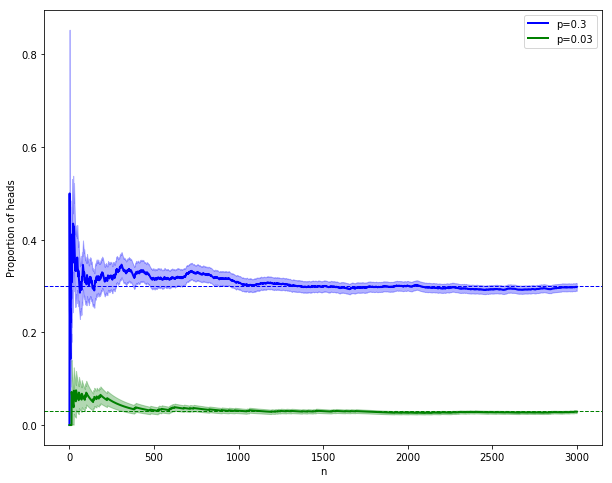

In [29]:
# Chapter 1
# Problem 21

import matplotlib.pyplot as plt
import numpy as np

p1 = 0.3
p2 = 0.03
prop_heads_p1 = [np.random.choice([1,0], p=[p1, 1-p1])]
prop_heads_p1_ul = [prop_heads_p1[0] + np.sqrt(prop_heads_p1[0]*(1-prop_heads_p1[0]))]
prop_heads_p1_ll = [prop_heads_p1[0] - np.sqrt(prop_heads_p1[0]*(1-prop_heads_p1[0]))]

prop_heads_p2 = [np.random.choice([1,0], p=[p2, 1-p2])]
prop_heads_p2_ul = [prop_heads_p2[0] + np.sqrt(prop_heads_p2[0]*(1-prop_heads_p2[0]))]
prop_heads_p2_ll = [prop_heads_p2[0] - np.sqrt(prop_heads_p2[0]*(1-prop_heads_p2[0]))]

for i in range(1, 3000):
    prop_heads_p1.append( (prop_heads_p1[i-1]*i + np.random.choice([1,0], p=[p1, 1-p1]))/(i+1) )
    prop_heads_p1_ul.append( prop_heads_p1[i] + np.sqrt(prop_heads_p1[i]*(1-prop_heads_p1[i])/(i+1)) )
    prop_heads_p1_ll.append( prop_heads_p1[i] - np.sqrt(prop_heads_p1[i]*(1-prop_heads_p1[i])/(i+1)) )
    prop_heads_p2.append( (prop_heads_p2[i-1]*i + np.random.choice([1,0], p=[p2, 1-p2]))/(i+1) )
    prop_heads_p2_ul.append( prop_heads_p2[i] + np.sqrt(prop_heads_p2[i]*(1-prop_heads_p2[i])/(i+1)) )
    prop_heads_p2_ll.append( prop_heads_p2[i] - np.sqrt(prop_heads_p2[i]*(1-prop_heads_p2[i])/(i+1)) )
    
x = np.arange(0, 3000, 1)
plt.rcParams["figure.figsize"] = (10,8)
plt.plot(prop_heads_p1, linewidth=2.0, color = 'b', label = 'p=0.3')
plt.fill_between(x, prop_heads_p1_ul, prop_heads_p1_ll, color='b', alpha=0.3)
plt.axhline(y = p1, linewidth=1, linestyle='--', color='b')
plt.plot(prop_heads_p2, linewidth=2.0, color = 'g', label = 'p=0.03')
plt.fill_between(x, prop_heads_p2_ul, prop_heads_p2_ll, color='g', alpha=0.3)
plt.axhline(y = p2, linewidth=1, linestyle='--', color='g')
plt.legend()
plt.xlabel('n')
plt.ylabel('Proportion of heads')
plt.show()

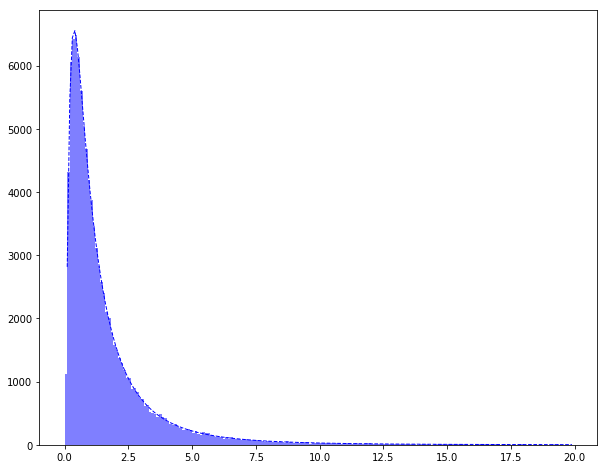

In [131]:
# Chapter 2
# Problem 13
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.random.normal(0, 1, 100000)
y = [math.exp(num) for num in x]

yy = np.arange(0.1,20,0.1)
fy = [10000*norm.pdf(math.log(n))/n for n in yy]

plt.plot(yy, fy, linewidth=1, linestyle='--', color='b')
plt.hist(y, bins=np.arange(0, 20,0.1), facecolor='blue', alpha=0.5)
plt.show()


In [99]:
print(x)
x.sum()

[-0.27473586 -0.38664644 -0.2980121  ...  0.4143253  -0.27123243
 -1.02485701]


-9.799531455922612

In [22]:
# Let z = log(x) + log(y). X and Y have a uniform distribution over the unit square. Find standard deviation of Z:
import numpy as np
import math

sample = np.random.rand(2,100000)
z = []
for i in range(sample.shape[1]):
    z.append( math.log(sample[0][i]) + math.log(sample[1][i]) )

z = np.asarray(z)
print("Expected sigma_z = {0:.3f}, bootstrapping = {1:.3f}".format(math.sqrt(2), z.std()))

Expected sigma_z = 1.414, bootstrapping = 1.416


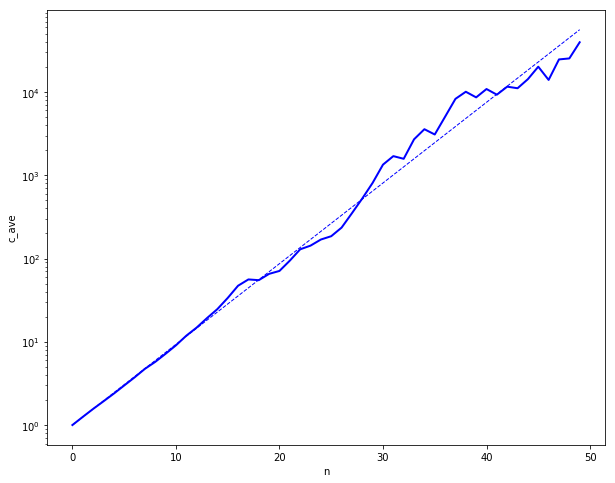

In [63]:
# Chapter 3
# Problem 1
steps = 50
sim = 10000
c_ave = [0]*steps
c_ave[0] = sim
for j in range(sim):
    c = [1]
    for n in range(1,steps):
        tmp = c[n-1]*np.random.choice([2,1/2], p=[1/2, 1/2])
        c.append( tmp )
        c_ave[n] = c_ave[n] + tmp
c_ave = [x/sim for x in c_ave]

plt.rcParams["figure.figsize"] = (10,8)
plt.plot(c_ave, linewidth=2.0, color = 'b')
c_res = [(5/4)**n for n in range(steps)]
plt.plot(c_res, linewidth=1, linestyle='--', color='b')
plt.yscale('log')
plt.xlabel('n')
plt.ylabel('c_ave')
plt.show()

Real mean 0.001, sigma 0.102


Text(0, 0.5, 'Frequency')

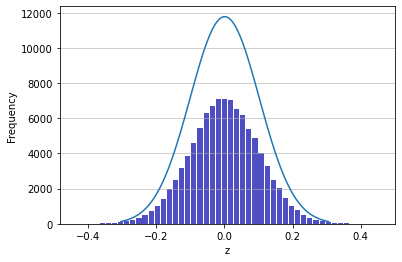

In [1]:
# Z = Y/X where X and Y are normal distributed. What is the limited distribution of Z?
# Result gets wild numerically once mean of x gets close to zero... 

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

num = 100000
z = []

for i in range(num):
    x = np.random.normal(10,1)
    y = np.random.normal(0,1)
    z.append(y/x)

z = np.asarray(z)
plt.hist(z, bins=50, color='#0504aa', alpha=0.7, rwidth=0.85)

rMean = z.mean()
sigma = z.std()
print("Real mean {0:.3f}, sigma {1:.3f}".format(rMean, sigma))
x = np.linspace(rMean - 3*sigma, rMean + 3*sigma, 100)
plt.plot(x, 3000*stats.norm.pdf(x, rMean, sigma))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('z')
plt.ylabel('Frequency')

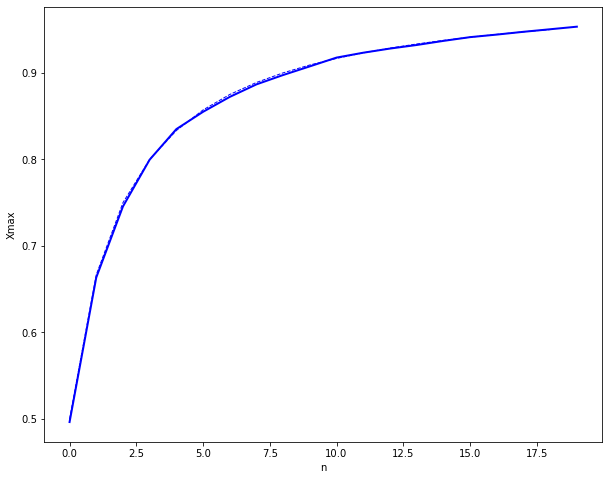

In [94]:
# Chapter 3
# Problem 3
import random as ra

points = 20
sim = 1000
Xmax = [0]*(points+1)
for j in range(sim):
    p = []
    for i in range(1, points+1):
        p.append(ra.uniform(0,1))
        Xmax[i] = Xmax[i] + max(p)
Xmax = [x/sim for x in Xmax]

plt.rcParams["figure.figsize"] = (10,8)
plt.plot(Xmax[1:], linewidth=2.0, color = 'b')
Xmax_res = [n/(n+1) for n in range(1, points)]
plt.plot(Xmax_res, linewidth=1, linestyle='--', color='b')
plt.xlabel('n')
plt.ylabel('Xmax')
plt.show()

mean 0.998, std 0.028
Normal range (0.943, 1.053)
Pivot range (0.944, 1.050)
Percentile range (0.946, 1.052)
Real mean 1.000, sigma 0.028


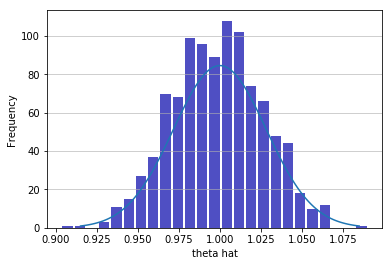

In [174]:
# Chapter 5
# Exercise 5.10

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

mu = 5
n = 100

x1 = [np.random.normal(mu,1) for _ in range(n)]
x2 = [np.random.normal(mu,1) for _ in range(n)]

thetaSample = []
for i in range(1000):
    bootSample1 = np.random.choice(x1, len(x1))
    bootSample2 = np.random.choice(x2, len(x2))
    thetaSample.append( bootSample1.mean()/bootSample2.mean() )
me = np.asarray(x1).mean()/np.asarray(x2).mean()
sd = np.asarray(thetaSample).std()
qb = np.quantile(thetaSample, alpha/2)
qt = np.quantile(thetaSample, 1-alpha/2)
alpha = 0.05
print("mean {0:.3f}, std {1:.3f}".format(me, sd))
print("Normal range ({0:.3f}, {1:.3f})".format(me-2*sd, me+2*sd))
print("Pivot range ({0:.3f}, {1:.3f})".format(2*me - qt, 2*me - qb))
print("Percentile range ({0:.3f}, {1:.3f})".format(qb, qt))
plt.hist(x = thetaSample, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

rMean = 1
sigma = math.sqrt(2/n)/mu
print("Real mean {0:.3f}, sigma {1:.3f}".format(rMean, sigma))
x = np.linspace(rMean - 3*sigma, rMean + 3*sigma, 100)
plt.plot(x, 6*stats.norm.pdf(x, rMean, sigma))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('theta hat')
plt.ylabel('Frequency')
plt.show()

1.7612485439301746
0.15926264295897793


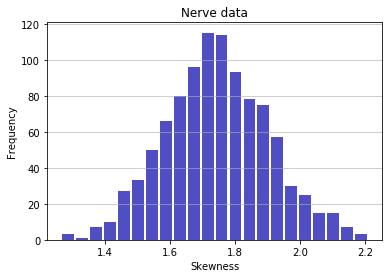

In [30]:
# Chapter 8
# Example 8.2
# Bootstrapping 

# Nerve data
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt

f = open('NerveData', 'r')
nerve = list(map(float, f.read().split()))
f.close()

skewSample = []
for i in range(1000):
    bootSample = np.random.choice(nerve, len(nerve))
    skewSample.append( skew(bootSample) )
print( skew(nerve) )
print( np.asarray(skewSample).std() )

plt.hist(x = skewSample, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Skewness')
plt.ylabel('Frequency')
plt.title('Nerve data')
plt.show()

mean 0.776, std 0.134
Normal range (0.509, 1.000)
Pivot range (0.591, 1.000)
Percentile range (0.483, 0.962)


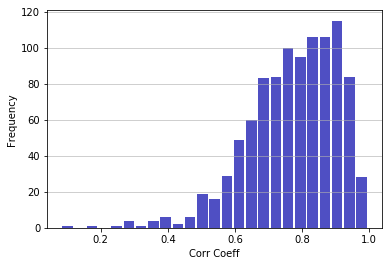

In [104]:
# Chapter 8
# Example 8.6

import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt

LSTA = [576, 635, 558, 578, 666, 580, 555, 661, 651, 605, 653, 575, 545, 572, 594]
GPA = [3.39, 3.30, 2.81, 3.03, 3.44, 3.07, 3.00, 3.43, 3.36, 3.13, 3.12, 2.74, 2.76, 2.88, 2.96]
# plt.scatter(LSTA, GPA)  # Data plot
data = np.asmatrix([[LSTA[i], GPA[i]] for i in range(len(LSTA))])

corr = []
for i in range(1000):
    idx = np.random.choice(len(data),len(data))
    dataSample = data[idx]
    corr.append( np.corrcoef(np.asarray(dataSample[:,0]).flatten(),
                             np.asarray(dataSample[:,1]).flatten())[0,1] )
mu = np.corrcoef(GPA, LSTA)[0,1]
sd = np.asarray(corr).std()
qb = np.quantile(corr, alpha/2)
qt = np.quantile(corr, 1-alpha/2)
alpha = 0.05
print("mean {0:.3f}, std {1:.3f}".format(mu, sd))
print("Normal range ({0:.3f}, {1:.3f})".format(mu-2*sd, min(1,mu+2*sd)))
print("Pivot range ({0:.3f}, {1:.3f})".format(2*mu - qt, min(1,2*mu - qb)))
print("Percentile range ({0:.3f}, {1:.3f})".format(qb, qt))

plt.hist(x = corr, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Corr Coeff')
plt.ylabel('Frequency')
plt.show()

mean 6.179, std 0.303
Normal range (5.573, 6.786)
Pivot range (5.501, 6.687)
Percentile range (5.672, 6.858)


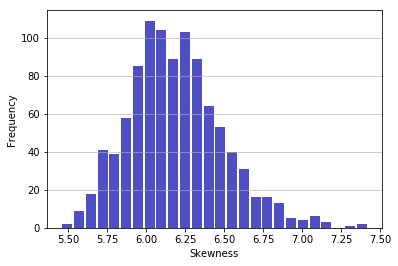

In [123]:
# Chapter 8
# Exercise 8.2

import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt

y = [np.random.normal() for _ in range(1000000)]
x = [math.exp(num) for num in y]
skewSample = []
for i in range(1000):
    bootSample = np.random.choice(x, len(x))
    skewSample.append( skew(bootSample) )
mu = skew(x)
sd = np.asarray(skewSample).std()
qb = np.quantile(skewSample, alpha/2)
qt = np.quantile(skewSample, 1-alpha/2)
alpha = 0.05
print("mean {0:.3f}, std {1:.3f}".format(mu, sd))
print("Normal range ({0:.3f}, {1:.3f})".format(mu-2*sd, mu+2*sd))
print("Pivot range ({0:.3f}, {1:.3f})".format(2*mu - qt, 2*mu - qb))
print("Percentile range ({0:.3f}, {1:.3f})".format(qb, qt))

plt.hist(x = skewSample, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Skewness')
plt.ylabel('Frequency')
plt.show()

mean 147.871, std 14.273
Normal range (119.325, 176.418)
Pivot range (116.799, 171.989)
Percentile range (123.753, 178.943)
Real mean 148.413, sigma 14.841


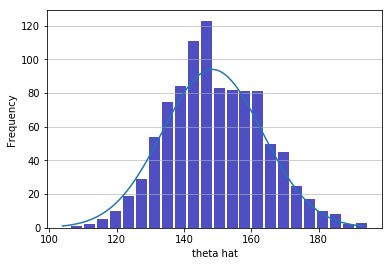

In [151]:
# Chapter 8
# Exercise 8.6

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

mu = 5
n = 100

x = [np.random.normal(mu,1) for _ in range(n)]
thetaSample = []
for i in range(1000):
    bootSample = np.random.choice(x, len(x))
    thetaSample.append( math.exp(bootSample.mean()) )
me = math.exp(np.asarray(x).mean())
sd = np.asarray(thetaSample).std()
qb = np.quantile(thetaSample, alpha/2)
qt = np.quantile(thetaSample, 1-alpha/2)
alpha = 0.05
print("mean {0:.3f}, std {1:.3f}".format(me, sd))
print("Normal range ({0:.3f}, {1:.3f})".format(me-2*sd, me+2*sd))
print("Pivot range ({0:.3f}, {1:.3f})".format(2*me - qt, 2*me - qb))
print("Percentile range ({0:.3f}, {1:.3f})".format(qb, qt))
plt.hist(x = thetaSample, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

sigma = math.exp(mu)/math.sqrt(n)
rMean = math.exp(mu)
print("Real mean {0:.3f}, sigma {1:.3f}".format(rMean, sigma))
x = np.linspace(rMean - 3*sigma, rMean + 3*sigma, 100)
plt.plot(x, 3500*stats.norm.pdf(x, rMean, sigma))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('theta hat')
plt.ylabel('Frequency')
plt.show()

mean 0.998, std 0.025
Normal range (0.948, 1.048)
Pivot range (0.998, 1.068)
Percentile range (0.927, 0.998)
Real mean 0.980, sigma 0.019


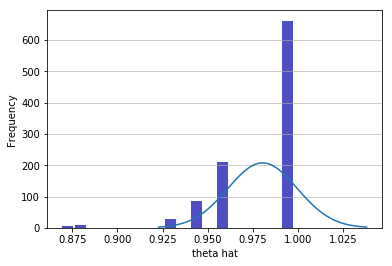

In [161]:
# Chapter 8
# Exercise 8.7

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

th = 1
n = 50

x = [np.random.uniform(0,th) for _ in range(n)]
thetaSample = []
for i in range(1000):
    bootSample = np.random.choice(x, len(x))
    thetaSample.append( max(bootSample) )
me = max(x)
sd = np.asarray(thetaSample).std()
qb = np.quantile(thetaSample, alpha/2)
qt = np.quantile(thetaSample, 1-alpha/2)
alpha = 0.05
print("mean {0:.3f}, std {1:.3f}".format(me, sd))
print("Normal range ({0:.3f}, {1:.3f})".format(me-2*sd, me+2*sd))
print("Pivot range ({0:.3f}, {1:.3f})".format(2*me - qt, 2*me - qb))
print("Percentile range ({0:.3f}, {1:.3f})".format(qb, qt))
plt.hist(x = thetaSample, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

rMean = n/(n+1)*th
sigma = math.sqrt(n/(n+2))*th/(n+1)
print("Real mean {0:.3f}, sigma {1:.3f}".format(rMean, sigma))
x = np.linspace(rMean - 3*sigma, rMean + 3*sigma, 100)
plt.plot(x, 10*stats.norm.pdf(x, rMean, sigma))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('theta hat')
plt.ylabel('Frequency')
plt.show()

MLE mean 2.137, std 0.122, analytical std 0.117
NP mean 2.123, std 0.140, analytical std 0.183


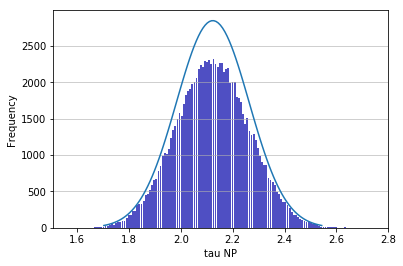

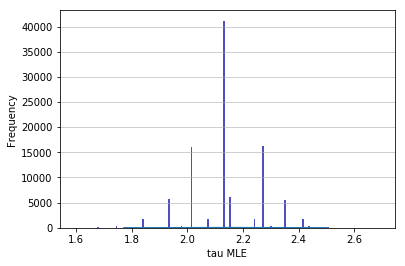

In [210]:
# Chapter 9
# Exercise 9.2

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

a = 1
b = 3
n = 10

x = [np.random.uniform(a,b) for _ in range(n)]
tauSampleMLE = []
tauSampleNP = []
for i in range(100000):
    bootSample = np.random.choice(x, len(x))
    tauSampleMLE.append( (max(bootSample) + min(bootSample))/2 )
    tauSampleNP.append( bootSample.mean() )
meanMLE = np.asarray(tauSampleMLE).mean()
sdMLE = np.asarray(tauSampleMLE).std()
sdMLE_pred = math.sqrt( n*(b-a)*(b-a)/(2*(n+1)*(n+1)*(n+2)) )
meanNP = np.asarray(tauSampleNP).mean()
sdNP = np.asarray(tauSampleNP).std()
sdNP_pred = math.sqrt( (b-a)*(b-a)/(12*n) )
print("MLE mean {0:.3f}, std {1:.3f}, analytical std {2:.3f}".format(meanMLE, sdMLE, sdMLE_pred))
print("NP mean {0:.3f}, std {1:.3f}, analytical std {2:.3f}".format(meanNP, sdNP, sdNP_pred))

plt.hist(x = tauSampleNP, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
x = np.linspace(meanNP - 3*sdNP, meanNP + 3*sdNP, 100)
plt.plot(x, 1000*stats.norm.pdf(x, meanNP, sdNP))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('tau NP')
plt.ylabel('Frequency')
plt.show()

plt.hist(x = tauSampleMLE, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
x = np.linspace(meanMLE - 3*sdMLE, meanMLE + 3*sdMLE, 100)
plt.plot(x, 10*stats.norm.pdf(x, meanMLE, sdMLE))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('tau MLE')
plt.ylabel('Frequency')
plt.show()

In [223]:
# Chapter 9
# Exercise 9.3

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

x = np.asarray([3.23, -2.50, 1.88, -0.68, 4.43, 0.17, 1.03, -0.07, -0.01, 0.76, 1.76, 3.18, 0.33, 
                -0.31, 0.30, -0.61, 1.52, 5.43, 1.54, 2.28, 0.42, 2.33, -1.03, 4.00, 0.39])
mu = np.mean(x)
sig = np.std(x)
tau = mu + sig*stats.norm.ppf(0.95)
se = sig/math.sqrt(len(x))*math.sqrt( 1+math.pow(stats.norm.ppf(0.95),2)/2 )
print("tau {0:.3f}  se {1:.3f}".format(tau, se))

# Parametric bootstrap
n = len(x)
bootSample = []
for i in range(10000):
    sample = [np.random.normal(mu,sig) for _ in range(n)]
    bootSample.append( np.mean(sample) + np.std(sample)*stats.norm.ppf(0.95) )
print("se parametric bootstrap {0:.3f}".format( np.asarray(bootSample).std() ))

tau 4.180  se 0.558
se parametric bootstrap 0.554


In [234]:
# Chapter 9
# Exercise 9.6

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

n1 = 200
n2 = 200
x1 = 160
x2 = 148
p1 = x1/n1
p2 = x2/n2
seMLE = math.sqrt(p1*(1-p1)/n1 + p2*(1-p2)/n2)
print("MLE: p1 - p2 {0:.3f}  se {1:.3f}".format(p1 - p2, seMLE))

# Parametric bootstrap
bootSample = [np.random.binomial(n1, p1, 1)/n1 - np.random.binomial(n2, p2, 1)/n2 for _ in range(1000) ]
seBoot = np.asarray(bootSample).std()
print("se parametric bootstrap: {0:.3f}".format( seBoot ))

MLE: p1 - p2 0.060  se 0.042
se parametric bootstrap: 0.041


In [284]:
# Chapter 10
# Exercise 10.7

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

x = np.asarray([.225, .262, .217, .240, .230, .229, .235, .217])
y = np.asarray([.209, .205, .196, .210, .202, .207, .224, .223, .220, .201])

# Wald estimate test
xmean = x.mean()
xstd  = x.std()/math.sqrt(len(x))
ymean = y.mean()
ystd  = y.std()/math.sqrt(len(y))
std = math.sqrt(xstd*xstd + ystd*ystd)
W = (xmean - ymean)/std
print("Wald test {0:.3f}".format(W))
print("p-value {0:.4f}".format(2*(1-stats.norm.cdf(W))))
print("confidence interval mean difference ({0:.4f},{1:.4f})".format(xmean-ymean-2*std, xmean-ymean+2*std))
print("Enough evidence to reject hypothesis it is the same person")

# Permutation test
z = np.append(x,y)
total = 10000
per = 0
for _ in range(total):
    tmp = np.random.permutation(z)
    if abs(tmp[0:8].mean() - tmp[8:18].mean()) >= xmean - ymean:
        per = per + 1
print("Permutation test p-value {0:.4f}".format(per/total))
print("Enough evidence to reject hypothesis it is the same person")

Wald test 3.945
p-value 0.0001
confidence interval mean difference (0.0109,0.0334)
Enough evidence to reject hypothesis it is the same person
Permutation test p-value 0.0009
Enough evidence to reject hypothesis it is the same person


In [67]:
# Chapter 11
# Exercise 11.4

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

n1 = 50
n2 = 50
x1 = 30
x2 = 40
p1 = x1/n1
p2 = x2/n2
seMLE = math.sqrt(p1*(1-p1)/n1 + p2*(1-p2)/n2)
print("a. MLE: p2 - p1 {0:.3f}  se {1:.3f}".format(p2 - p1, seMLE))

# Parametric bootstrap
bootSample = [np.random.binomial(n2, p2, 1)/n2 - np.random.binomial(n1, p1, 1)/n1 
              for _ in range(10000) ]
seBoot = np.asarray(bootSample).std()
print("b. se parametric bootstrap: {0:.3f}".format( seBoot ))

# Bayesian calculation (cannot use binomial since p is not yet determined!)
bayeSample = [np.random.beta(x2+1, n2-x2+1, 1) - np.random.beta(x1+1, n1-x1+1, 1) 
              for _ in range(10000) ]
meanBaye = np.asarray(bayeSample).mean()
seBaye   = np.asarray(bayeSample).std()
print("c. Bayesian mean: {0:.3f}  se: {1:.3f}".format( meanBaye, seBaye ))
 
# MLE phi    
seMLE = math.sqrt(1/(p1*(1-p1)*n1) + 1/(p2*(1-p2)*n2))
print("d. MLE: phi {0:.3f}  se {1:.3f}".format(math.log(p1*(1-p2)/(p2*(1-p1))), seMLE))

# Bayesian phi  
bayeSample = []
for _ in range(10000):
    t2 = np.random.beta(x2+1, n2-x2+1, 1)
    t1 = np.random.beta(x1+1, n1-x1+1, 1) 
    bayeSample.append(math.log(t1*(1-t2)/(t2*(1-t1))))
meanBaye = np.asarray(bayeSample).mean()
seBaye   = np.asarray(bayeSample).std()
print("e. Bayesian mean: {0:.3f}  se: {1:.3f}".format( meanBaye, seBaye ))

a. MLE: p2 - p1 0.200  se 0.089
b. se parametric bootstrap: 0.091
c. Bayesian mean: 0.193  se: 0.088
d. MLE: phi -0.981  se 0.456
e. Bayesian mean: -0.950  se: 0.445


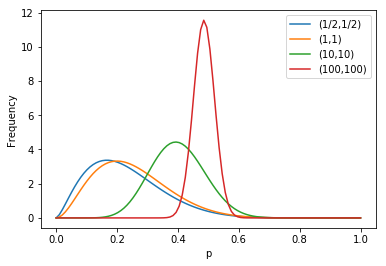

In [79]:
# Chapter 11
# Exercise 11.5

import matplotlib.pyplot as plt
import scipy.stats as stats

n = 10
s = 2
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, s+1/2, n-s+1/2), label='(1/2,1/2)')
plt.plot(x, stats.beta.pdf(x, s+1, n-s+1), label='(1,1)')
plt.plot(x, stats.beta.pdf(x, s+10, n-s+10), label='(10,10)')
plt.plot(x, stats.beta.pdf(x, s+100, n-s+100), label='(100,100)')
plt.xlabel('p')
plt.ylabel('Frequency')
plt.legend(loc='best')
plt.show()

In [121]:
# Hubble data
#Distance: Distance from the earth (mega parsecs)
#Recession Velocity: The recession Velocity (km / sec)

import numpy as np
from sklearn.linear_model import LinearRegression

data = np.asarray([[0.032, 170], [0.034, 290], [0.214, -130], [0.263, -70], 
        [0.275, -185], [0.275, -220], [0.45, 200], [0.5, 290], [0.5, 270],
        [0.63, 200], [0.8, 300], [0.9, -30], [0.9, 650], [0.9, 150], 
        [0.9, 500], [1, 920], [1.1, 450], [1.1, 500], [1.4, 500], 
        [1.7, 960], [2, 500], [2, 850], [2, 800], [2, 1090]])

# V = b0 + b1 D
# Calculating b0 and b1 with uncertainties

# With formulas:
meanV = data[:,1].mean()
meanD = data[:,0].mean()

num = 0
den = 0
for i in range(len(data)):
    num = num + (data[i,0]-meanD)*(data[i,1]-meanV)
    den = den + (data[i,0]-meanD)*(data[i,0]-meanD)
b1 = num/den
b0 = meanV - b1*meanD
sig = 0
x2 = 0
for i in range(len(data)):
    sig = sig + (data[i,1]-(meanV - b1*data[i,0]))*(data[i,1]-(meanV - b1*data[i,0]))
    x2 = x2 + data[i,0]*data[i,0]
sig = sig/(len(data)-2)
sig = math.sqrt(sig)
delta_b0 = sig/den*math.sqrt(x2/len(data))
delta_b1 = sig/den
#print("b0 = {0:.3f} +- {1:.3f}".format(b0, delta_b0))
#print("b1 = {0:.3f} +- {1:.3f}".format(b1, delta_b1))

# With scikit:
reg = LinearRegression().fit(data[:,0].reshape(-1, 1), data[:,1])
#print("b0 = {0:.3f}".format(reg.intercept_))
#print("b1 = {0:.3f}".format(reg.coef_[0]))

# Fitting setting the intercept to zero:
num = 0
den = 0
for i in range(len(data)):
    num = num + (data[i,0])*(data[i,1])
    den = den + (data[i,0])*(data[i,0])
b1 = num/den
sig = 0
for i in range(len(data)):
    sig = sig + (data[i,1]-b1*data[i,0])*(data[i,1]-b1*data[i,0])
sig = sig/(len(data)-1)
sig = math.sqrt(sig)
delta_b1 = sig/den
print("b1 = {0:.3f} +- {1:.3f}".format(b1, delta_b1))

# With scikit:
reg = LinearRegression(fit_intercept = False)
reg.fit(data[:,0].reshape(-1, 1), data[:,1])
print("b0 = {0:.3f}".format(reg.intercept_))
print("b1 = {0:.3f}".format(reg.coef_[0]))

b1 = 423.937 +- 7.759
b0 = 0.000
b1 = 423.937


In [128]:
# Example 15.5
from scipy import stats

n = 646
p0_ = 255/n
p1_ = 391/n
p_0 = 174/n
p_1 = 472/n
x00 = n*p0_*p_0
x01 = n*p0_*p_1
x10 = n*p1_*p_0
x11 = n*p1_*p_1
U = (90-x00)*(90-x00)/x00 + (165-x01)*(165-x01)/x01 + \
    (84-x10)*(84-x10)/x10 + (307-x11)*(307-x11)/x11
print("P(chi-sq > {0:.3f}) = {1:0.4f}".format(U, stats.chi2.pdf(U , 1)
))

P(chi-sq > 14.959) = 0.0001


In [149]:
# Example 15.10

from scipy import stats

data = np.asarray([[74, 18, 12], [68, 16, 12], [154, 54, 58], [18, 10, 44]])
n = data.sum()
pZ = [ data[i,:].sum()/n for i in range(0,4) ]
pY = [ data[:,i].sum()/n for i in range(0,3) ]
u = 0
for i in range(len(pZ)):
    for j in range(len(pY)):
        eij = n*pZ[i]*pY[j]
        u = u + (data[i,j]-eij)*(data[i,j]-eij)/eij
print("P(chi-sq > {0:.3f}) = {1:0.14f}".format(u, stats.chi2.pdf(u , 3*2)
))

P(chi-sq > 75.890) = 0.00000000000001


In [205]:
# Chapter 15
# Exercise 3 from notes
from scipy import stats

data = np.asarray([[12, 4], [39, 49]])

# Using chi-square method
n = data.sum()
pZ = [ data[i,:].sum()/n for i in range(0,2) ]
pY = [ data[:,i].sum()/n for i in range(0,2) ]
u = 0
for i in range(len(pZ)):
    for j in range(len(pY)):
        eij = n*pZ[i]*pY[j]
        u = u + (data[i,j]-eij)*(data[i,j]-eij)/eij
print("P(chi-sq > {0:.3f}) = {1:0.3f}".format(u, stats.chi2.pdf(u , 1)
))

# Using log-odds Wald test
logPhi = math.log(12*49/(39*4))
sePhi = math.sqrt(1/12 + 1/49 + 1/39 + 1/4)

# Bootstrapping to get se:
n = 12+4+39+49
bootPhi = []
for _ in range(1000):
    x00 = np.random.binomial(n, 12/n)
    x11 = np.random.binomial(n, 49/n)
    x01 = np.random.binomial(n, 39/n)
    x10 = np.random.binomial(n, 4/n)
    if x00!=0 and x11!=0 and x01!=0 and x10!=0:
        bootPhi.append(math.log(x00*x11/(x01*x10)))
sePhiBoot =  np.asarray(bootPhi).std()
print("analytical se = {0:.3f}, bootstrap se = {1:.3f}".format(sePhi, sePhiBoot))
print("Range odds ratio ({0:.3f}, {1:.3f})".format(
    math.exp(logPhi-2*sePhi), math.exp(logPhi+2*sePhi)))

P(chi-sq > 5.100) = 0.014
analytical se = 0.616, bootstrap se = 0.634
Range odds ratio (1.100, 12.920)


In [153]:
# Chapter 15
# Exercise 4 from notes
from scipy import stats

data = np.asarray([[55, 141], [33, 145], [70, 139], [49, 161]])

# Using chi-square method
n = data.sum()
pZ = [ data[i,:].sum()/n for i in range(0,4) ]
pY = [ data[:,i].sum()/n for i in range(0,2) ]
u = 0
for i in range(len(pZ)):
    for j in range(len(pY)):
        eij = n*pZ[i]*pY[j]
        u = u + (data[i,j]-eij)*(data[i,j]-eij)/eij
print("P(chi-sq > {0:.3f}) = {1:0.3f}".format(u, stats.chi2.pdf(u , 3)
))

P(chi-sq > 12.421) = 0.003


In [154]:
# Chapter 15
# Exercise 5 from notes
from scipy import stats

data = np.asarray([[7, 5, 3, 13], [27, 32, 8, 18], [55, 50, 7, 24]])

# Using chi-square method
n = data.sum()
pZ = [ data[i,:].sum()/n for i in range(0,3) ]
pY = [ data[:,i].sum()/n for i in range(0,4) ]
u = 0
for i in range(len(pZ)):
    for j in range(len(pY)):
        eij = n*pZ[i]*pY[j]
        u = u + (data[i,j]-eij)*(data[i,j]-eij)/eij
print("P(chi-sq > {0:.3f}) = {1:0.3f}".format(u, stats.chi2.pdf(u , 6)
))

P(chi-sq > 15.370) = 0.007


In [159]:
# Chapter 15
# Exercise 6 from notes
from scipy import stats

allData = np.asarray([[80-45, 45], [75-26, 26], [85-52, 52], 
                      [67-35, 35], [85-37, 37]])

for k in range(1,5):
    data = np.asarray([allData[0,:], allData[k,:]])
    # Using chi-square method
    n = data.sum()
    pZ = [ data[i,:].sum()/n for i in range(0,2) ]
    pY = [ data[:,i].sum()/n for i in range(0,2) ]
    u = 0
    for i in range(len(pZ)):
        for j in range(len(pY)):
            eij = n*pZ[i]*pY[j]
            u = u + (data[i,j]-eij)*(data[i,j]-eij)/eij
    print("for {0:d}, P(chi-sq > {1:.3f}) = {2:0.3f}".format(
        k, u, stats.chi2.pdf(u , 1)))

for 1, P(chi-sq > 7.264) = 0.004
for 2, P(chi-sq > 0.413) = 0.505
for 3, P(chi-sq > 0.237) = 0.729
for 4, P(chi-sq > 2.668) = 0.064


a. P(Z=1|Y=1) = 0.835


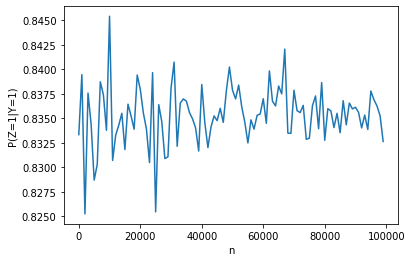

In [59]:
# Chapter 17
# Exercise 8
import numpy as np
import matplotlib.pyplot as plt
import math

p_x = 1/2
def p_yGivenx (x):
    return math.exp(4*x-2)/(1+ math.exp(4*x-2))
def p_zGivenxy (x, y):
    return math.exp(2*(x+y)-2)/(1+ math.exp(2*(x+y)-2))

print("a. P(Z=1|Y=1) = {0:.3f}".format( 
    (p_x*p_yGivenx(0)*p_zGivenxy(0,1)+p_x*p_yGivenx(1)*p_zGivenxy(1,1))/(p_x*p_yGivenx(0)+p_x*p_yGivenx(1)) 
    ) )

nArray = [i for i in range(10,10000,1000)]
p_z1Giveny1 = []
for n in nArray:
    x = np.random.binomial(1, p_x, n)
    yGivenx = np.asarray([np.random.binomial(1, p_yGivenx (x[i])) for i in range(n)])
    zGivenyx = np.asarray([np.random.binomial(1, p_zGivenxy (x[i], yGivenx[i])) for i in range(n)])
    p_z1Giveny1.append(sum(yGivenx * zGivenyx == 1)/sum(yGivenx == 1))

plt.plot(nArray, p_z1Giveny1)
plt.xlabel('n')
plt.ylabel('P(Z=1|Y=1)')
plt.show()

c. P(Z=1|Y:=1) = 0.690


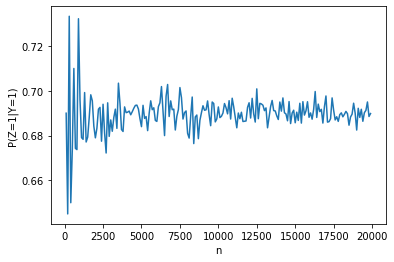

In [65]:
# Chapter 17
# Exercise 8 (continuation)
print("c. P(Z=1|Y:=1) = {0:.3f}".format( 
    (p_x*p_zGivenxy(0,1)+p_x*p_zGivenxy(1,1)) 
    ) )

nArray = [i for i in range(100,20000,100)]
p_z1Giveny1 = []
for n in nArray:
    x = np.random.binomial(1, p_x, n)
    zGivenyx = np.asarray([np.random.binomial(1, p_zGivenxy (x[i], 1)) for i in range(n)])
    p_z1Giveny1.append(sum(zGivenyx == 1)/n)

plt.plot(nArray, p_z1Giveny1)
plt.xlabel('n')
plt.ylabel('P(Z=1|Y=1)')
plt.show()

In [51]:
# Chapter 18
# Exercise 4 from notes
import numpy as np
import math
from scipy import stats

allData = np.asarray([ [[35, 59], [47, 112]], [[42, 77], [26, 76]] ])


# X1 || X2 | X3
t = 0
for i in range(2):
    for j in range(2):
        for k in range(2):
            t = t + 2*allData[i,j,k]*math.log( 
                allData[i,j,k]*allData[:,:,k].sum()/(allData[i,:,k].sum()*allData[:,j,k].sum()) )       
print("for X1 || X2 | X3 test, P(T > {0:.3f}) = {1:0.3f}".format(
        t, 1-stats.chi2.cdf(t , 2)))

# X1 || X3 | X2
t = 0
for i in range(2):
    for j in range(2):
        for k in range(2):
            t = t + 2*allData[i,j,k]*math.log( 
                allData[i,j,k]*allData[:,j,:].sum()/(allData[:,j,k].sum()*allData[i,j,:].sum()) )       
print("for X1 || X3 | X2 test, P(T > {0:.3f}) = {1:0.3f}".format(
        t, 1-stats.chi2.cdf(t , 2)))

# X2 || X3 | X1
t = 0
for i in range(2):
    for j in range(2):
        for k in range(2):
            t = t + 2*allData[i,j,k]*math.log( 
                allData[i,j,k]*allData[i,:,:].sum()/(allData[i,:,k].sum()*allData[i,j,:].sum()) )       
print("for X2 || X3 | X1 test, P(T > {0:.3f}) = {1:0.3f}".format(
        t, 1-stats.chi2.cdf(t , 2)))

print('Therefore x1 ----- X2          X3')

for X1 || X2 | X3 test, P(T > 13.781) = 0.001
for X1 || X3 | X2 test, P(T > 0.600) = 0.741
for X2 || X3 | X1 test, P(T > 4.072) = 0.131
Therefore x1 ----- X2          X3


In [1]:
# Chapter 19
# Exercise 5 from notes
import numpy as np
import math
from scipy import stats

allData = np.asarray([ [[2, 8], [4, 16]], [[16, 128], [32, 256]] ])


# X1 || X2 | X3
t = 0
for i in range(2):
    for j in range(2):
        for k in range(2):
            t = t + 2*allData[i,j,k]*math.log( 
                allData[i,j,k]*allData[:,:,k].sum()/(allData[i,:,k].sum()*allData[:,j,k].sum()) )       
print("for X1 || X2 | X3 test, P(T > {0:.3f}) = {1:0.3f}".format(
        t, 1-stats.chi2.cdf(t , 2)))

# X1 || X3 | X2
t = 0
for i in range(2):
    for j in range(2):
        for k in range(2):
            t = t + 2*allData[i,j,k]*math.log( 
                allData[i,j,k]*allData[:,j,:].sum()/(allData[:,j,k].sum()*allData[i,j,:].sum()) )       
print("for X1 || X3 | X2 test, P(T > {0:.3f}) = {1:0.3f}".format(
        t, 1-stats.chi2.cdf(t , 2)))

# X2 || X3 | X1
t = 0
for i in range(2):
    for j in range(2):
        for k in range(2):
            t = t + 2*allData[i,j,k]*math.log( 
                allData[i,j,k]*allData[i,:,:].sum()/(allData[i,:,k].sum()*allData[i,j,:].sum()) )       
print("for X2 || X3 | X1 test, P(T > {0:.3f}) = {1:0.3f}".format(
        t, 1-stats.chi2.cdf(t , 2)))

print('Therefore x1 ----- X2          X3')

for X1 || X2 | X3 test, P(T > 0.000) = 1.000
for X1 || X3 | X2 test, P(T > 1.843) = 0.398
for X2 || X3 | X1 test, P(T > 0.000) = 1.000
Therefore x1 ----- X2          X3


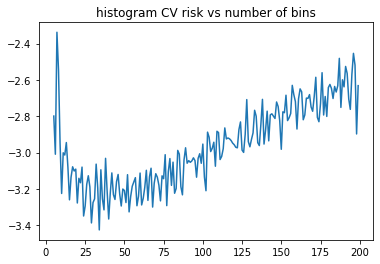

Bin length is 0.67
Bandwidth is 1.04


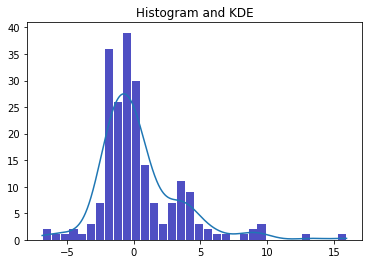

In [171]:
# Chapter 20
# Exercise 2

# Glass data
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

glass = pd.read_csv('glassData.dat', header = 0, index_col = 0, sep ='\s+')

# Histogram
def histo_bin_risk(binArray, data):
    risk = []
    n = data.size
    for m in binArray:
        histo, bins = np.histogram(data, bins = m) 
        p = histo/n
        risk.append( 2*m/(n-1) - m*(n+1)/(n-1)*sum(p*p) )
    return risk

binArray = [i for i in range(5,200)]
risk = histo_bin_risk(binArray, glass['RI'])
m = binArray[np.argmin(risk)]
plt.plot( binArray, risk)
plt.title("histogram CV risk vs number of bins") 
plt.show()

histo, bins = np.histogram(data, bins = m) 
print("Bin length is {0:.2f}".format((bins[-1]-bins[0])/m))
plt.hist(glass['RI'], bins = bins, color='#0504aa', alpha=0.7, rwidth=0.9) 

# KDE
density = gaussian_kde(glass['RI'])
print("Bandwidth is {0:.2f}".format(density.covariance_factor()*glass['RI'].std()))
xmin = min(glass['RI'])
xmax = max(glass['RI'])
x = np.linspace(xmin, xmax, 1000)
y = glass['RI'].size*density(x)*(bins[-1]-bins[0])/m
plt.plot(x, y)
plt.title("Histogram and KDE") 
plt.show()

In [ ]:
# Chapter 20
# Exercise 3